# 加州房价预测回归模型

## 加州住房数据集
**California housing dataset（加州住房数据集）**数据集是一个回归数据集，数据集的目标是根据一系列地区特征（如人口、房间数、收入等）来预测加州地区的住房价格。

- MedHouseVal：住房价格（单位：10万）
- MedInc：家庭收入（单位：万）
- HouseAge：房屋年龄（单位：年）
- AveRooms：平均房间数
- AveBedrms：平均卧室数
- Population：人口
- AveOccup：平均家庭人口
- Latitude：纬度
- Longitude：经度

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# 加载加州住房数据集
data = fetch_california_housing()
X = data.data
y = data.target

# 划分训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林回归模型
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 在训练集上训练模型
rf_regressor.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_regressor.predict(X_test)

# 残差图（Residual Plot）

**残差图**用于展示残差（实际值与预测值的差异）与预测值（或输入特征）之间的关系，特别适合用于检验模型拟合的质量。通过残差图可以判断回归模型是否存在某些系统性的误差或偏差，从而指导模型的改进。

- 残差 = 真实值 - 预测值
- 残差反映了模型在给定数据点上的预测误差，理想情况下，模型的残差应该是随机的，且均匀分布在零周围。

## 残差图的组成结构

- 横轴：表示预测值。
- 纵轴：表示残差。
- 散点：残差图中的每一个散点代表一组观测的预测值与残差的关系。
- 零轴：也即残差图的基准线，位于纵轴的0处。它表示残差为0，即实际值与预测值完全一致的位置。
- 拟合线：表示回归模型对残差的拟合结果，拟合线与零轴越贴近则模型拟合效果越好，代表此时残差为0。

## 残差图如何解读

- 理想情况：残差图中的点应该均匀、随机地分布在零附近，没有明显的规律性。这表明模型的拟合效果好。
- 非理想情况：
    - **系统性偏差**：如果残差图中的点按某种模式分布（例如弯曲的形状），则说明模型没有完全捕捉到数据中的某些趋势，需要考虑使用更复杂的模型或者特征工程。
    - **异方差性**：如果残差的散布随着预测值的增大或减小而变化（如呈现扩展的漏斗形状），可能说明模型的误差不均匀（即存在异方差性）
    - **非正态分布**：如果残差的分布偏离正态分布，可能意味着模型未能完全拟合数据
    - **点有明显的偏差或离群值**：数据中有异常值或噪声，需要进行数据清洗

## sns.residplot

- `x`: 预测值。
- `y`: 残差值。
- `lowess`: 是否使用局部加权回归。
- `scatter_kws`: 设置散点属性。
    - `s`: 点的大小
    - `alpha`: 点的透明度
    - `color`: 点的颜色
    - `marker`: 标记样式
- `line_kws`: 设置回归线属性。 
    - `alpha`: 回归线的透明度
    - `color`: 回归线的颜色
    - `lw`: 回归线的宽度
    - `ls`: 回归线的线型
        - 实线: `-`
        - 虚线: `--`
        - 点线: `:`
        - 点划线: `-.`

**color颜色清单**

| 英文     | 中文       |
|----------|------------|
| blue     | 蓝色       |
| green    | 绿色       |
| red      | 红色       |
| yellow   | 黄色       |
| black    | 黑色       |
| white    | 白色       |
| cyan     | 青色       |
| magenta  | 品红色     |
| orange   | 橙色       |
| purple   | 紫色       |
| pink     | 粉色       |
| brown    | 棕色       |
| gray     | 灰色       |
| grey     | 灰色       |
| beige    | 米色       |
| lime     | 酸橙色     |
| violet   | 紫罗兰色   |
| indigo   | 靛蓝色     |

## 残差图实际案例

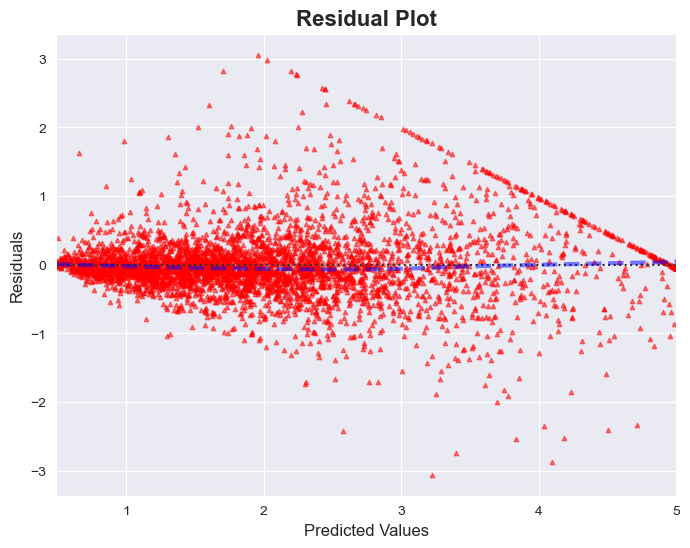

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算残差
residuals = y_test - y_pred

# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 创建画布并设置图像大小
plt.figure(figsize=(8, 6))

# 绘制残差图
sns.residplot(x=y_pred, y=residuals, scatter_kws={'s':10, 'alpha':0.5, 'color':'red', 'marker':'^'}, lowess=True, line_kws={'alpha':0.5, 'color': 'blue','lw':3, 'ls':'--'})

# 设置图表标题和标签
plt.title('Residual Plot', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# 增加网格线
plt.grid(True)

# 渲染并显示图表
plt.show()


1. **残差分布不均匀，呈现区间依赖性**  
   • **现象**：预测值两端（1-2和4-5区间）的红色三角形密集聚集在零线附近（残差绝对值≤1），而中间区域（2-4区间）残差分散（范围-3到+2）。  
   • **解释**：模型对极端值（高/低预测值）预测较稳定，但对中等预测值区间的拟合波动较大。

2. **系统性偏差集中在中间预测区间**  
   • **现象**：预测值2-4对应的残差分布明显偏离零线，且负残差（-3到0）占比更高。  
   • **解释**：模型可能低估了该区间真实值，或未捕捉到数据中的非线性关系（如二次趋势、交互效应）。

3. **异方差性显著**  
   • **现象**：中间预测区间的残差散布范围远大于两端区间，形成“中间宽、两端窄”的漏斗形。  
   • **解释**：模型误差方差随预测值变化，违反同方差假设，需检查数据分布或进行变量变换。

4. **离群值暴露模型局部缺陷**  
   • **现象**：预测值2.5-3.5区间存在极端负残差（接近-3的红色三角形）。  
   • **解释**：可能是数据噪声或模型未能拟合复杂模式（如突变点、特殊影响因素）。

5. **模型整体表现**  
   • **优点**：残差在预测值1-5范围内分布相对均匀，无明显上升/下降趋势（如整体未呈现“U型”或“喇叭形”），说明模型未出现全局性偏差，基线预测能力可靠。  
   • **潜在风险**：中间区域（预测值2-4）残差波动范围较大（-3到+2），也即方差较大，可能存在**局部过拟合**或**特征缺失**，需进一步验证。

# 实际值 vs 预测值图（Actual vs Predicted Plot）

## 实际值 vs 预测值图的组成结构

- 横轴：表示实际值
- 纵轴：表示预测值
- 散点：每组散点代表一对观测——实际值与预测值
- 对角线：对角线是从左下角到右上角的一条线，表示当实际值和预测值完全相等时的情况

## 实际值 vs 预测值图如何解读

- **理想情况**：如果回归模型能够完美拟合数据，那么每个观测点的预测值应该完全等于实际值，也即所有的散点都会落在对角线附近。
- **非理想情况**：
    - **点离对角线较远**：说明模型存在较大的**方差**，模型拟合效果差。
    - **点集中在一侧**：如果散点集中在对角线的上方或者下方，那就说明模型存在系统的**偏差**。
    - **少量点偏离对角线较远**：远离对角线的点代表**异常值**，需要在建模前进行剔除。

## sns.scatterplot
绘制散点图
- `x`: 观测值。
- `y`: 预测值。
- `marker`: 散点标记。
    - `o`：圆圈。
    - `^`：上三角形。
    - `s`：正方形。
    - `*`：星号。
- `s`: 散点大小。
- `alpha`: 散点透明度。
- `color`: 散点颜色。

## plt.plot
绘制图形
- `x`: 横坐标数据（可以是列表、NumPy 数组、Pandas Series）。
- `y`: 纵坐标数据（可以是列表、NumPy 数组、Pandas Series）。
- `color`: 散点颜色。
- `linestyle`: 设置线条的样式
    - `-`：实线（默认）。
    - `--`：虚线。
    - `:`：点线。
    - `-.`：点划线。
- `linewidth`: 线条宽度。
- `marker`: 散点标记样式。
    - `o`：圆圈。
    - `^`：上三角形。
    - `s`：正方形。
    - `*`：星号。
- `alpha`: 散点透明度。

**color颜色清单**

| 英文     | 中文       |
|----------|------------|
| blue     | 蓝色       |
| green    | 绿色       |
| red      | 红色       |
| yellow   | 黄色       |
| black    | 黑色       |
| white    | 白色       |
| cyan     | 青色       |
| magenta  | 品红色     |
| orange   | 橙色       |
| purple   | 紫色       |
| pink     | 粉色       |
| brown    | 棕色       |
| gray     | 灰色       |
| grey     | 灰色       |
| beige    | 米色       |
| lime     | 酸橙色     |
| violet   | 紫罗兰色   |
| indigo   | 靛蓝色     |

## 实际值 vs 预测值图实际案例

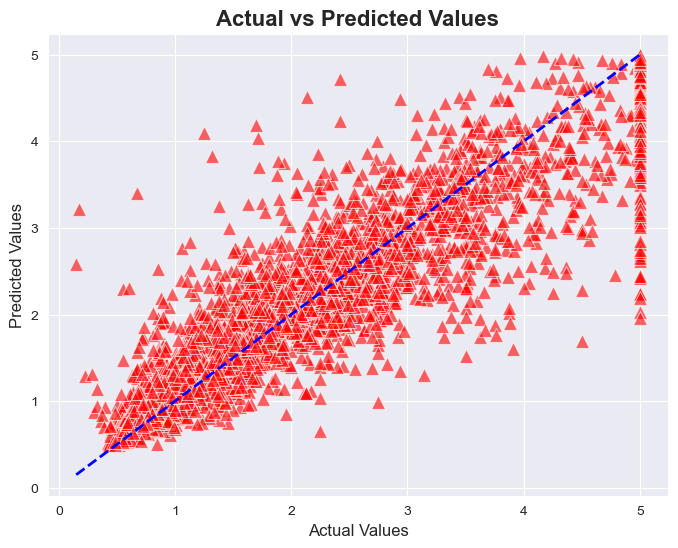

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算残差
residuals = y_test - y_pred

# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 创建画布并设置图像大小
plt.figure(figsize=(8, 6))

# 绘制实际值 vs 预测值图
sns.scatterplot(x=y_test, y=y_pred, marker='^', s=100, alpha=0.6, color='red')

# 绘制完美预测线（对角线）
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2)

# 设置图表标题和标签
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)

# 增加网格线
plt.grid(True)

# 渲染并显示图表
plt.show()

1. **整体拟合良好，核心区域预测准确**  
    - **表现**：数据点（红色三角形）密集分布在蓝色对角线附近（实际值1-4区间），表明模型对**中等范围数值预测较精准**。  
    - **解读**：模型在核心数据区域（非极端值）满足基本需求，预测值与实际值高度一致。

2. **无系统性偏差，但存在局部高方差**  
    - **无偏差**：散点均匀分布在对角线上下方，未集中偏向某一侧，说明模型无整体高估或低估趋势。  
    - **高方差**：在**实际值0-1和4-5的极端区域**，数据点离散程度高（如实际值0对应预测值0-5），表明模型对极端值预测不稳定。

3. **异常值暴露模型局限性**  
    - **显著偏离点**：存在少量远离对角线的点（如实际值2对应预测值0或5），可能是**数据噪声**或**模型未捕捉特殊模式**。  
    -  **影响**：这些点可能拉低全局指标（如R²），需针对性处理。

4. **极端值区间需针对性优化**  
    - **问题**：实际值0-1和4-5区域的预测值分布范围广，误差较大。  
    - **原因**：可能是训练数据中极端样本不足，或模型复杂度不足以拟合边界情况。